# Load Data

In [1]:
import os
import csv
import pandas as pd
import numpy as np

def load_data(folder_path):
    data_list = []
    for file in os.listdir(folder_path):
        if file.endswith('tsv'):
                with open(folder_path+file) as tsvfile:
                    tsvreader = csv.reader(tsvfile, delimiter="\t")
                    all_lines = []
                    for line in tsvreader:
                        all_lines.append(line)
                data = pd.DataFrame(all_lines)
                data.columns = data.iloc[0]
                data = data[1:]
                data_list.append(data)
    
    return data_list

In [2]:
os.listdir('data/')

['mnli_train.tsv',
 'snli_train.tsv',
 '.ipynb_checkpoints',
 'snli_val.tsv',
 'mnli_val.tsv']

In [29]:
mnli_train, snli_train, snli_val, mnli_val = load_data('data/')

# Tokenize Data

In [30]:
import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]

In [31]:
import multiprocessing as mp

# This is the code cell that tokenizes train/val/test datasets
# However it takes about 15-20 minutes to run it
# For convinience we have provided the preprocessed datasets
# Please see the next code cell

def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    with mp.Pool(5) as pool:
        token_dataset=pool.map(tokenize,dataset)
        
    flatten = lambda l: [item for sublist in l for item in sublist]
    all_tokens=flatten(token_dataset)    
    return token_dataset, all_tokens

In [32]:
LABELS = {v: i for i, v in enumerate(snli_train.label.unique())}
GENRES = {v: i for i, v in enumerate(mnli_train.genre.unique())}

lables_encoding = lambda l: LABELS[l]
genres_encoding = lambda l: GENRES[l]

train_labels = list(map(lables_encoding,snli_train['label']))
val_labels = list(map(lables_encoding,snli_val['label']))
mnli_train_labels = list(map(lables_encoding,mnli_train['label']))
mnli_train_genres = list(map(genres_encoding,mnli_train['genre']))
mnli_val_labels = list(map(lables_encoding,mnli_val['label']))
mnli_val_genres = list(map(genres_encoding,mnli_val['genre']))

In [33]:
import pickle as pkl

In [ ]:
print("SNLI")
# snli train
print ("Tokenizing train data")
train_premise_tokens, train_all_premise_tokens = tokenize_dataset(snli_train['sentence1'])
train_hypothesis_tokens, train_all_hypothesis_tokens = tokenize_dataset(snli_train['sentence2'])
# train_labels = snli_train['label'].map(LABELS).tolist()
pkl.dump(train_premise_tokens, open("train_premise_tokens.p", "wb"))
pkl.dump(train_hypothesis_tokens, open("train_hypothesis_tokens.p", "wb"))
pkl.dump(train_all_premise_tokens, open("train_all_premise_tokens.p", "wb"))
pkl.dump(train_all_hypothesis_tokens, open("train_all_hypothesis_tokens.p", "wb"))

# snli val
print ("Tokenizing val data")
val_premise_tokens, _ = tokenize_dataset(snli_val['sentence1'])
val_hypothesis_tokens, _ = tokenize_dataset(snli_val['sentence2'])
# val_labels = snli_val['label'].map(LABELS).tolist()
pkl.dump(val_premise_tokens, open("val_premise_tokens.p", "wb"))
pkl.dump(val_hypothesis_tokens, open("val_hypothesis_tokens.p", "wb"))

#---------------------------------------------------------------------------------------------------
print("MNLI")
# mnli train
print ("Tokenizing train data")
mnli_train_premise_tokens, mnli_train_all_premise_tokens = tokenize_dataset(mnli_train['sentence1'])
mnli_train_hypothesis_tokens, mnli_train_all_hypothesis_tokens = tokenize_dataset(mnli_train['sentence2'])
# mnli_train_labels = mnli_train['label'].map(LABELS).tolist()
# mnli_train_genres = mnli_train['genre'].map(GENRES).tolist()
pkl.dump(mnli_train_premise_tokens, open("mnli_train_premise_tokens.p", "wb"))
pkl.dump(mnli_train_hypothesis_tokens, open("mnli_train_hypothesis_tokens.p", "wb"))
pkl.dump(mnli_train_all_premise_tokens, open("mnli_train_all_premise_tokens.p", "wb"))
pkl.dump(mnli_train_all_hypothesis_tokens, open("mnli_train_all_hypothesis_tokens.p", "wb"))

# mnli val
print("Tokending val data")
mnli_val_premise_tokens, _ = tokenize_dataset(mnli_val['sentence1'])
mnli_val_hypothesis_tokens, _ = tokenize_dataset(mnli_val['sentence2'])
# mnli_val_labels = mnli_val['label'].map(LABELS).tolist()
# mnli_val_genres = mnli_val['genre'].map(GENRES).tolist()
pkl.dump(mnli_val_premise_tokens, open("mnli_val_premise_tokens.p", "wb"))
pkl.dump(mnli_val_hypothesis_tokens, open("mnli_val_hypothesis_tokens.p", "wb"))

In [34]:
# check labels are not null values
np.isnan(np.array(train_labels)).any() == False
np.isnan(np.array(val_labels)).any() == False

True

In [35]:
# Then, load preprocessed train, val and test datasets
train_premise_tokens = pkl.load(open("train_premise_tokens.p", "rb"))
train_hypothesis_tokens = pkl.load(open("train_hypothesis_tokens.p", "rb"))
train_all_premise_tokens = pkl.load(open("train_all_premise_tokens.p", "rb"))
train_all_hypothesis_tokens = pkl.load(open("train_all_hypothesis_tokens.p", "rb"))

val_premise_tokens = pkl.load(open("val_premise_tokens.p", "rb"))
val_hypothesis_tokens = pkl.load(open("val_hypothesis_tokens.p", "rb"))

# double checking
print ("Train premise dataset size is {}".format(len(train_premise_tokens)))
print ("Train hypothesis dataset size is {}".format(len(train_hypothesis_tokens)))
print ("Val premise size is {}".format(len(val_premise_tokens)))
print ("Val hypothesis size is {}".format(len(train_all_hypothesis_tokens)))

print ("Total number of premise tokens in train dataset is {}".format(len(train_all_premise_tokens)))
print ("Total number of hypothesis tokens in train dataset is {}".format(len(train_all_hypothesis_tokens)))
print ("Total number of *unique* premise tokens in train dataset is {}".format(len(set(train_all_premise_tokens))))
print ("Total number of *unique* hypothesis tokens in train dataset is {}".format(len(set(train_all_hypothesis_tokens))))

Train premise dataset size is 100000
Train hypothesis dataset size is 100000
Val premise size is 1000
Val hypothesis size is 743372
Total number of premise tokens in train dataset is 1294135
Total number of hypothesis tokens in train dataset is 743372
Total number of *unique* premise tokens in train dataset is 14131
Total number of *unique* hypothesis tokens in train dataset is 15225


In [36]:
# do the same for MN
# Then, load preprocessed train, val and test datasets
mnli_train_premise_tokens = pkl.load(open("mnli_train_premise_tokens.p", "rb"))
mnli_train_hypothesis_tokens = pkl.load(open("mnli_train_hypothesis_tokens.p", "rb"))
mnli_train_all_premise_tokens = pkl.load(open("mnli_train_all_premise_tokens.p", "rb"))
mnli_train_all_hypothesis_tokens = pkl.load(open("mnli_train_all_hypothesis_tokens.p", "rb"))

mnli_val_premise_tokens = pkl.load(open("mnli_val_premise_tokens.p", "rb"))
mnli_val_hypothesis_tokens = pkl.load(open("mnli_val_hypothesis_tokens.p", "rb"))

# double checking
print ("Train premise dataset size is {}".format(len(mnli_train_premise_tokens)))
print ("Train hypothesis dataset size is {}".format(len(mnli_train_hypothesis_tokens)))
print ("Val premise size is {}".format(len(mnli_val_premise_tokens)))
print ("Val hypothesis size is {}".format(len(mnli_train_all_hypothesis_tokens)))

print ("Total number of premise tokens in train dataset is {}".format(len(mnli_train_all_premise_tokens)))
print ("Total number of hypothesis tokens in train dataset is {}".format(len(mnli_train_all_hypothesis_tokens)))
print ("Total number of *unique* premise tokens in train dataset is {}".format(len(set(mnli_train_all_premise_tokens))))
print ("Total number of *unique* hypothesis tokens in train dataset is {}".format(len(set(mnli_train_all_hypothesis_tokens))))

Train premise dataset size is 20000
Train hypothesis dataset size is 20000
Val premise size is 5000
Val hypothesis size is 204944
Total number of premise tokens in train dataset is 425559
Total number of hypothesis tokens in train dataset is 204944
Total number of *unique* premise tokens in train dataset is 28020
Total number of *unique* hypothesis tokens in train dataset is 17790


In [37]:
# get all tokens from both premise and hypothesis
train_all_tokens = train_all_premise_tokens + train_all_hypothesis_tokens
mnli_train_all_tokens = mnli_train_all_premise_tokens + mnli_train_all_hypothesis_tokens

### Vocabulary

Now, we are going to create the vocabulary of most common 10,000 tokens in the training set. Remember that we will add special tokens <unk> and <pad> to the vocabulary.

In [38]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(train_all_tokens)
mnli_token2id, mnli_id2token = build_vocab(mnli_train_all_tokens)

In [39]:
import random
# Lets check the dictionary by loading random token from it

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 5139 ; token holder
Token holder; token id 5139


In [40]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_premise_indices = token2index_dataset(train_premise_tokens)
train_hypothesis_indices = token2index_dataset(train_hypothesis_tokens)
val_premise_indices = token2index_dataset(val_premise_tokens)
val_hypothesis_indices = token2index_dataset(val_hypothesis_tokens)

mnli_train_premise_indices = token2index_dataset(mnli_train_premise_tokens)
mnli_train_hypothesis_indices = token2index_dataset(mnli_train_hypothesis_tokens)
mnli_val_premise_indices = token2index_dataset(mnli_val_premise_tokens)
mnli_val_hypothesis_indices = token2index_dataset(mnli_val_hypothesis_tokens)

# double checking
print ("Train premise dataset size is {}".format(len(train_premise_indices)))
print ("Train hypothesis dataset size is {}".format(len(train_hypothesis_indices)))
print ("Val premise dataset size is {}".format(len(val_premise_indices)))
print ("Val hypothesis dataset size is {}".format(len(val_hypothesis_indices)))

Train premise dataset size is 100000
Train hypothesis dataset size is 100000
Val premise dataset size is 1000
Val hypothesis dataset size is 1000


Visualize a random training premise sample

In [41]:
rand_training_premise_example = random.randint(0, len(train_premise_indices) - 1)
print (train_premise_tokens[rand_training_premise_example])
print(train_premise_indices[rand_training_premise_example])

['a', 'baby', 'is', 'sleeping', 'peacefully', 'under', 'a', 'warm', 'checkered', 'blue', 'blanket']
[2, 144, 5, 156, 3950, 233, 2, 1073, 1230, 31, 674]


In [42]:
import numpy as np
def get_length(data):
    lengths = [len(row) for row in data]
    return int(np.quantile(lengths, 0.99))

In [43]:
MAX_SENTENCE_LENGTH1, MAX_SENTENCE_LENGTH2 = get_length(train_premise_indices), get_length(train_hypothesis_indices)

In [44]:
mnli_MAX_SENTENCE_LENGTH1, mnli_MAX_SENTENCE_LENGTH2 = get_length(mnli_train_premise_indices), get_length(mnli_train_hypothesis_indices)

### Pytorch DataLoader for SNLI

In [45]:
import torch
from torch.utils.data import Dataset

class SNLIDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list1, data_list2, target_list):
        """
        @param data_list: list of SNLI tokens 
        @param target_list: list of SNLI targets 

        """
        self.data_list1 = data_list1
        self.data_list2 = data_list2
        self.target_list = target_list
        assert (len(self.data_list1) == len(self.target_list))
        assert (len(self.data_list2) == len(self.target_list))

    def __len__(self):
        return len(self.data_list1)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        token_idx1 = self.data_list1[key][:MAX_SENTENCE_LENGTH1]
        token_idx2 = self.data_list2[key][:MAX_SENTENCE_LENGTH2]
        label = self.target_list[key]
        return [token_idx1, len(token_idx1), token_idx2, len(token_idx2), label]


In [46]:
def SNLI_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list1 = []
    data_list2 = []
    label_list = []
    length_list1 = []
    length_list2= []
#     print("collate batch: ", batch[0][0])
#     batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[4])
        length_list1.append(datum[1])
        length_list2.append(datum[3])
    # padding
    for datum in batch:
        padded_vec1 = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH1-datum[1])), 
                                mode="constant", constant_values=0)
        padded_vec2 = np.pad(np.array(datum[2]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH2-datum[3])), 
                                mode="constant", constant_values=0)
        data_list1.append(padded_vec1)
        data_list2.append(padded_vec2)
        
    return [torch.from_numpy(np.array(data_list1)), torch.LongTensor(length_list1), 
            torch.from_numpy(np.array(data_list2)), torch.LongTensor(length_list2),torch.LongTensor(label_list)]

In [47]:
BATCH_SIZE = 32

# train
train_dataset = SNLIDataset(train_premise_indices, train_hypothesis_indices, train_labels)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=SNLI_collate_func,
                                           shuffle=True)

# val
val_dataset = SNLIDataset(val_premise_indices, val_hypothesis_indices, val_labels)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=SNLI_collate_func,
                                           shuffle=True)

In [48]:
for i, (data1, lengths1, data2, lengths2, labels) in enumerate(train_loader):
    temp_batch1 = data1
    length_batch1 = lengths1
    print(data1.shape)
    print(data2.shape)
    print(labels.shape)
    break

torch.Size([32, 32])
torch.Size([32, 18])
torch.Size([32])


## Define your models: NeuralNet and LogReg

In [49]:
def merge_two_matrices(data1, data2, method):
    if method == 'cat':
        combined = torch.cat([data1, data2], dim = 1)
    elif method == 'sum':
        combined = data1 + data2
    elif method == 'element-wise product':
        combined = data1 * data2
    return combined

In [50]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

# define nn
class net(nn.Module):
    """
    2 layer NN with BagOfWords embedding
    """
    def __init__(self, vocab_size, emb_dim, input_dim, hidden_dim, num_classes, p=0):
        """
        @param vocab_size: size of the vocabulary.
        @param emb_dim: size of the word embedding
        @param input_dim: size of the input after embedding
        @hidden_dim: number of hidden nodes
        @num_classes: number of target classes
        @param p: proportion of Dropout, if not Dropout, p = 0, float
        """
        super(net, self).__init__()
        self.vocab_size, self.emb_dim, self.input_dim, self.hidden_dim, self.num_classes, self.dropout_rate = vocab_size, \
        emb_dim, input_dim, hidden_dim, num_classes, p
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0) # look-up table, emb_weight.size=vocab_size*emb_size
        print(input_dim)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, data1, lengths1, data2, lengths2, method):
        """
        @param combined_data: matrix of size (batch_size, emb_size*2).
        """
        # embeddings for data1
        out1 = self.embed(data1) # out.shape: batch_size * max_seq_length * emb_dim
        out1 = torch.sum(out1, dim=1) # out.shape: batch_size * emb_dim (concat along the max_seq_length dimension)
        out1 /= lengths1.view(lengths1.size()[0],1).expand_as(out1).float() # out.shape: batch_size * emb_dim (just scaling by the sequence REAL length)
        
        # embeddings for data2
        out2 = self.embed(data2) # out.shape: batch_size * max_seq_length * emb_dim
        out2 = torch.sum(out2, dim=1) # out.shape: batch_size * emb_dim (concat along the max_seq_length dimension)
        out2 /= lengths2.view(lengths2.size()[0],1).expand_as(out2).float() # out.shape: batch_size * emb_dim (just scaling by the sequence REAL length)
        
        out_combined = merge_two_matrices(out1, out2, method)

        out_combined = self.fc1(out_combined)
        out_combined = F.relu(out_combined)
        out_combined = F.dropout(out_combined, p=self.dropout_rate)
        out_combined = self.fc2(out_combined) # out_combined.shape: batch_size * num_classes
        
        return out_combined

In [51]:
# define logreg
class logreg(nn.Module):
    """
    Logistic regression with BagOfWords embedding
    """
    def __init__(self, vocab_size, emb_dim, input_dim, num_classes):
        """
        @param vocab_size: size of the vocabulary.
        @param emb_dim: size of the word embedding
        @param input_dim: size of the input after embedding
        @param num_classes: number of targets
        """
        super(logreg, self).__init__()
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.fc1 = nn.Linear(input_dim, num_classes)
    
    def forward(self, data1, lengths1, data2, lengths2, method):
        """
        @param combined_data: matrix of size (batch_size, emb_size*2).
        """
        # embeddings for data1
        out1 = self.embed(data1) # out.shape: batch_size * max_seq_length * emb_dim
        out1 = torch.sum(out1, dim=1) # out.shape: batch_size * emb_dim (concat along the max_seq_length dimension)
        out1 /= lengths1.view(lengths1.size()[0],1).expand_as(out1).float() # out.shape: batch_size * emb_dim (just scaling by the sequence REAL length)
        
        # embeddings for data1
        out2 = self.embed(data2) # out.shape: batch_size * max_seq_length * emb_dim
        out2 = torch.sum(out2, dim=1) # out.shape: batch_size * emb_dim (concat along the max_seq_length dimension)
        out2 /= lengths2.view(lengths2.size()[0],1).expand_as(out2).float() # out.shape: batch_size * emb_dim (just scaling by the sequence REAL length)
        
        out_combined = merge_two_matrices(out1, out2, method)
        
        out_combined = self.fc1(out_combined) # out_combined.shape: batch_size * num_classes
        
        return out_combined

### Train the Model

In [52]:
# Function for testing the model
def test_model(loader, model, method):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data1, lengths1, data2, lengths2, labels in loader:
        data1_batch, lengths1_batch, data2_batch, lengths2_batch, label_batch = data1, lengths1, data2, lengths2, labels
        outputs = F.softmax(model(data1_batch, lengths1_batch, data2_batch, lengths2_batch, method), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

In [53]:
# Function for training the model
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

def train_model(model, model_name, train_loader, val_loader, method,\
                optim, lr, num_epochs, adj, gamma=0.1, plot=False, save=True):
    '''
    model: the model object
    train_loader, val_loader
    optim: optimizer, str
    lr: initiated learning rate, float
    num_epochs: number of epoch, int
    adj: boolean, to adjust learning rate or not
    gamma: learning rate dedaying factor
    plot: boolean, to plot training loss and accuracy over time
    '''
    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()

    # Optimizer
    if optim == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)#, weight_decay = penalty)
    elif optim == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)#, weight_decay = penalty)
    
    if adj: #if adjust learning rate
        scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    
    train_loss = [] # to store training losses
    train_acc_lst = [] # to store training accuracy
    val_acc_lst = [] # to store validation accuracy
    
    for epoch in range(num_epochs):
        if adj:
            scheduler.step()
        
        for i, (data1, lengths1, data2, lengths2, labels) in enumerate(train_loader):
            data1_batch, lengths1_batch, data2_batch, lengths2_batch, label_batch = data1, lengths1, data2, lengths2, labels
            model.train()
            optimizer.zero_grad()
            # Forward pass
            outputs = F.softmax(model(data1_batch, lengths1_batch, data2_batch, lengths2_batch, method), dim=1)
            loss = criterion(outputs, label_batch)
            train_loss.append(loss)
            
            # Backward and optimize
            loss.backward()
            optimizer.step()
            # validate every 1000 iterations
            if i > 0 and i % 1000 == 0:
                # validate
                train_acc = test_model(train_loader, model, method)
                train_acc_lst.append(train_acc)
                val_acc = test_model(val_loader, model, method)
                val_acc_lst.append(val_acc)
                print('Epoch: [{}/{}], Step: [{}/{}], Training Acc: {}, Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), train_acc, val_acc))
                
    print('Finished training')
    
    if plot:
        fig = plt.figure(figsize = (10,5))
        axes = fig.subplots(nrows=1, ncols=2)
        # plot losses
        axes[0].plot(train_loss)
        axes[0].set_title("Training loss over time")
        axes[0].set_xlabel("Steps")
        axes[0].set_ylabel("Losses")
        # plot training & validation accuracy
        axes[1].plot(val_acc_lst, color='b', label='Val Acc')
        axes[1].plot(train_acc_lst, color='r', label='Train Acc')
        axes[1].set_title("Accuracy over time")
        axes[1].legend(loc='best')
        axes[1].set_xlabel("Steps")
        axes[1].set_ylabel("Accuracy")

    if save:
        torch.save(model, 'best_snli_model_'+str(model_name)+'.pth')
        return model

2 Layer neural network with Adam optimizer

1) Tune method of handling two word representations

200
Epoch: [1/5], Step: [1001/3125], Training Acc: 61.752, Validation Acc: 58.8
Epoch: [1/5], Step: [2001/3125], Training Acc: 64.073, Validation Acc: 60.6
Epoch: [1/5], Step: [3001/3125], Training Acc: 65.794, Validation Acc: 59.5
Epoch: [2/5], Step: [1001/3125], Training Acc: 66.946, Validation Acc: 61.5
Epoch: [2/5], Step: [2001/3125], Training Acc: 67.654, Validation Acc: 61.2
Epoch: [2/5], Step: [3001/3125], Training Acc: 68.822, Validation Acc: 63.3
Epoch: [3/5], Step: [1001/3125], Training Acc: 69.492, Validation Acc: 62.8
Epoch: [3/5], Step: [2001/3125], Training Acc: 69.344, Validation Acc: 63.7
Epoch: [3/5], Step: [3001/3125], Training Acc: 69.695, Validation Acc: 61.0
Epoch: [4/5], Step: [1001/3125], Training Acc: 69.947, Validation Acc: 62.8
Epoch: [4/5], Step: [2001/3125], Training Acc: 70.715, Validation Acc: 61.9
Epoch: [4/5], Step: [3001/3125], Training Acc: 69.743, Validation Acc: 61.1
Epoch: [5/5], Step: [1001/3125], Training Acc: 70.942, Validation Acc: 63.1
Epoch: [

/anaconda3/lib/python3.6/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


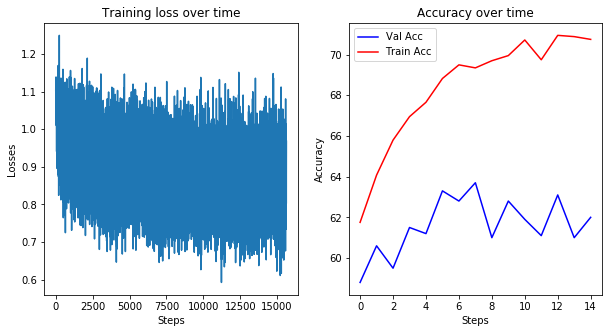

In [54]:
# concatenation
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Net = net(vocab_size, emb_dim, input_dim=emb_dim*2, hidden_dim=20, num_classes=num_classes, p=0)

SNLI_model = train_model(Net, 'Net_cat', train_loader, val_loader, method='cat', \
                optim='Adam', lr=0.01, num_epochs=5, adj=False, plot=True)

100
Epoch: [1/5], Step: [1001/3125], Training Acc: 61.545, Validation Acc: 57.6
Epoch: [1/5], Step: [2001/3125], Training Acc: 67.262, Validation Acc: 60.5
Epoch: [1/5], Step: [3001/3125], Training Acc: 71.133, Validation Acc: 62.3
Epoch: [2/5], Step: [1001/3125], Training Acc: 74.226, Validation Acc: 62.2
Epoch: [2/5], Step: [2001/3125], Training Acc: 75.513, Validation Acc: 63.1
Epoch: [2/5], Step: [3001/3125], Training Acc: 77.635, Validation Acc: 64.2
Epoch: [3/5], Step: [1001/3125], Training Acc: 78.169, Validation Acc: 62.1
Epoch: [3/5], Step: [2001/3125], Training Acc: 79.734, Validation Acc: 65.1
Epoch: [3/5], Step: [3001/3125], Training Acc: 79.205, Validation Acc: 62.1
Epoch: [4/5], Step: [1001/3125], Training Acc: 81.174, Validation Acc: 63.6
Epoch: [4/5], Step: [2001/3125], Training Acc: 81.374, Validation Acc: 61.9
Epoch: [4/5], Step: [3001/3125], Training Acc: 81.671, Validation Acc: 62.1
Epoch: [5/5], Step: [1001/3125], Training Acc: 82.14, Validation Acc: 61.9
Epoch: [5

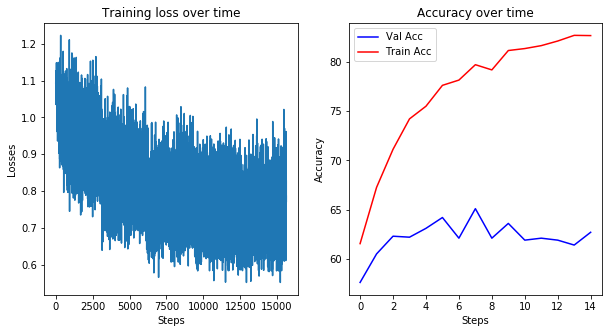

In [55]:
# element-wise product
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Net = net(vocab_size, emb_dim, input_dim=emb_dim, hidden_dim=20, num_classes=num_classes, p=0)

SNLI_model = train_model(Net, 'Net_element', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=0.01, num_epochs=5, adj=False, plot=True)

100
Epoch: [1/5], Step: [1001/3125], Training Acc: 54.927, Validation Acc: 51.9
Epoch: [1/5], Step: [2001/3125], Training Acc: 57.246, Validation Acc: 53.8
Epoch: [1/5], Step: [3001/3125], Training Acc: 59.149, Validation Acc: 56.1
Epoch: [2/5], Step: [1001/3125], Training Acc: 60.742, Validation Acc: 57.3
Epoch: [2/5], Step: [2001/3125], Training Acc: 61.484, Validation Acc: 56.9
Epoch: [2/5], Step: [3001/3125], Training Acc: 61.558, Validation Acc: 55.3
Epoch: [3/5], Step: [1001/3125], Training Acc: 61.484, Validation Acc: 55.3
Epoch: [3/5], Step: [2001/3125], Training Acc: 63.016, Validation Acc: 56.6
Epoch: [3/5], Step: [3001/3125], Training Acc: 63.49, Validation Acc: 56.5
Epoch: [4/5], Step: [1001/3125], Training Acc: 64.809, Validation Acc: 57.2
Epoch: [4/5], Step: [2001/3125], Training Acc: 64.404, Validation Acc: 56.6
Epoch: [4/5], Step: [3001/3125], Training Acc: 65.074, Validation Acc: 57.9
Epoch: [5/5], Step: [1001/3125], Training Acc: 65.105, Validation Acc: 57.0
Epoch: [5

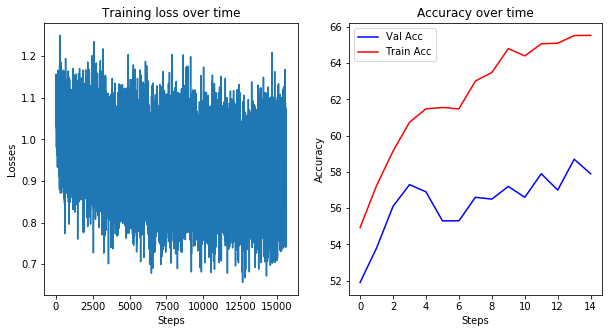

In [174]:
# sum
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Net = net(vocab_size, emb_dim, input_dim=emb_dim, hidden_dim=20, num_classes=num_classes, p=0)

SNLI_model = train_model(Net, 'Net_sum', train_loader, val_loader, method='sum', \
                optim='Adam', lr=0.01, num_epochs=5, adj=False, plot=True)

2) Optimization hyperparameters

Use linear annealing of lr

High learning rate

100
Epoch: [1/5], Step: [1001/3125], Training Acc: 33.173, Validation Acc: 33.1
Epoch: [1/5], Step: [2001/3125], Training Acc: 33.594, Validation Acc: 33.0
Epoch: [1/5], Step: [3001/3125], Training Acc: 33.781, Validation Acc: 33.7
Epoch: [2/5], Step: [1001/3125], Training Acc: 33.572, Validation Acc: 31.9
Epoch: [2/5], Step: [2001/3125], Training Acc: 33.753, Validation Acc: 32.2
Epoch: [2/5], Step: [3001/3125], Training Acc: 33.616, Validation Acc: 34.5
Epoch: [3/5], Step: [1001/3125], Training Acc: 33.561, Validation Acc: 31.1
Epoch: [3/5], Step: [2001/3125], Training Acc: 33.725, Validation Acc: 33.3
Epoch: [3/5], Step: [3001/3125], Training Acc: 33.518, Validation Acc: 34.3
Epoch: [4/5], Step: [1001/3125], Training Acc: 33.729, Validation Acc: 34.0
Epoch: [4/5], Step: [2001/3125], Training Acc: 33.649, Validation Acc: 31.4
Epoch: [4/5], Step: [3001/3125], Training Acc: 33.526, Validation Acc: 32.7
Epoch: [5/5], Step: [1001/3125], Training Acc: 33.518, Validation Acc: 32.1
Epoch: [

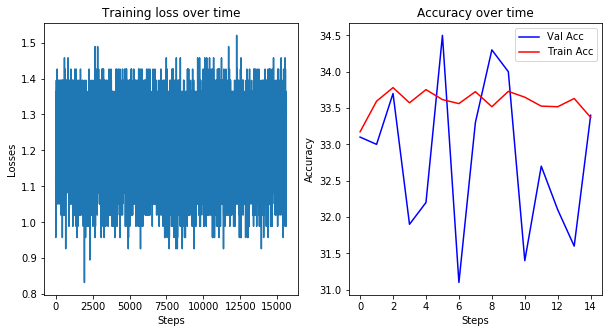

In [178]:
# Adam, lr = 1
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Net = net(vocab_size, emb_dim, input_dim=emb_dim, hidden_dim=20, num_classes=num_classes, p=0)

SNLI_model = train_model(Net, 'Net_adam_lr1', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=1, num_epochs=5, adj=False, plot=True)

Dropout rate = 0.3

100
Epoch: [1/5], Step: [1001/3125], Training Acc: 59.761, Validation Acc: 58.7
Epoch: [1/5], Step: [2001/3125], Training Acc: 64.853, Validation Acc: 62.1
Epoch: [1/5], Step: [3001/3125], Training Acc: 67.575, Validation Acc: 60.4
Epoch: [2/5], Step: [1001/3125], Training Acc: 71.308, Validation Acc: 64.2
Epoch: [2/5], Step: [2001/3125], Training Acc: 73.164, Validation Acc: 63.8
Epoch: [2/5], Step: [3001/3125], Training Acc: 73.445, Validation Acc: 62.0
Epoch: [3/5], Step: [1001/3125], Training Acc: 75.729, Validation Acc: 60.4
Epoch: [3/5], Step: [2001/3125], Training Acc: 76.365, Validation Acc: 63.5
Epoch: [3/5], Step: [3001/3125], Training Acc: 77.406, Validation Acc: 63.6
Epoch: [4/5], Step: [1001/3125], Training Acc: 77.66, Validation Acc: 64.0
Epoch: [4/5], Step: [2001/3125], Training Acc: 78.247, Validation Acc: 61.9
Epoch: [4/5], Step: [3001/3125], Training Acc: 78.769, Validation Acc: 61.2
Epoch: [5/5], Step: [1001/3125], Training Acc: 79.112, Validation Acc: 62.6
Epoch: [5

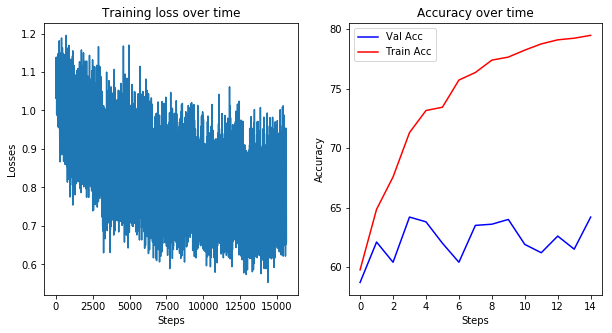

In [71]:
# element-wise product
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Net = net(vocab_size, emb_dim, input_dim=emb_dim, hidden_dim=20, num_classes=num_classes, p=0.3)

SNLI_model = train_model(Net, 'Net_element_p0.3', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=0.01, num_epochs=5, adj=False, plot=True)

SGD Optimizer

100
Epoch: [1/5], Step: [1001/3125], Training Acc: 33.89, Validation Acc: 32.4
Epoch: [1/5], Step: [2001/3125], Training Acc: 35.761, Validation Acc: 33.6
Epoch: [1/5], Step: [3001/3125], Training Acc: 36.714, Validation Acc: 33.2
Epoch: [2/5], Step: [1001/3125], Training Acc: 36.536, Validation Acc: 33.4
Epoch: [2/5], Step: [2001/3125], Training Acc: 36.958, Validation Acc: 36.2
Epoch: [2/5], Step: [3001/3125], Training Acc: 37.577, Validation Acc: 35.6
Epoch: [3/5], Step: [1001/3125], Training Acc: 38.504, Validation Acc: 36.4
Epoch: [3/5], Step: [2001/3125], Training Acc: 38.698, Validation Acc: 37.7
Epoch: [3/5], Step: [3001/3125], Training Acc: 38.635, Validation Acc: 37.2
Epoch: [4/5], Step: [1001/3125], Training Acc: 39.348, Validation Acc: 39.5
Epoch: [4/5], Step: [2001/3125], Training Acc: 39.48, Validation Acc: 39.6
Epoch: [4/5], Step: [3001/3125], Training Acc: 39.84, Validation Acc: 40.4
Epoch: [5/5], Step: [1001/3125], Training Acc: 40.298, Validation Acc: 38.7
Epoch: [5/5

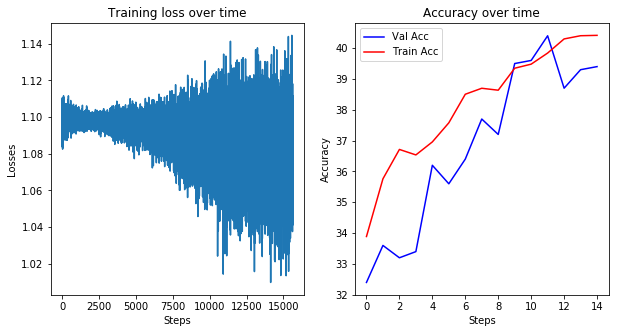

In [180]:
# SGD, lr = 0.01 --> slower convergence (plot both loss plot and accuracy)
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Net = net(vocab_size, emb_dim, input_dim=emb_dim, hidden_dim=20, num_classes=num_classes, p=0)

SNLI_model = train_model(Net, 'Net_adam_lr1', train_loader, val_loader, method='element-wise product', \
                optim='SGD', lr=0.01, num_epochs=5, adj=False, plot=True)

Logistic regression

Epoch: [1/5], Step: [1001/3125], Training Acc: 62.493, Validation Acc: 57.6
Epoch: [1/5], Step: [2001/3125], Training Acc: 68.728, Validation Acc: 63.1
Epoch: [1/5], Step: [3001/3125], Training Acc: 72.788, Validation Acc: 64.5
Epoch: [2/5], Step: [1001/3125], Training Acc: 76.609, Validation Acc: 65.3
Epoch: [2/5], Step: [2001/3125], Training Acc: 79.129, Validation Acc: 65.9
Epoch: [2/5], Step: [3001/3125], Training Acc: 81.092, Validation Acc: 65.5
Epoch: [3/5], Step: [1001/3125], Training Acc: 82.864, Validation Acc: 64.9
Epoch: [3/5], Step: [2001/3125], Training Acc: 83.817, Validation Acc: 64.6
Epoch: [3/5], Step: [3001/3125], Training Acc: 84.996, Validation Acc: 66.0
Epoch: [4/5], Step: [1001/3125], Training Acc: 85.951, Validation Acc: 66.9
Epoch: [4/5], Step: [2001/3125], Training Acc: 86.475, Validation Acc: 65.2
Epoch: [4/5], Step: [3001/3125], Training Acc: 87.071, Validation Acc: 64.0
Epoch: [5/5], Step: [1001/3125], Training Acc: 87.621, Validation Acc: 64.3
Epoch: [5/5]

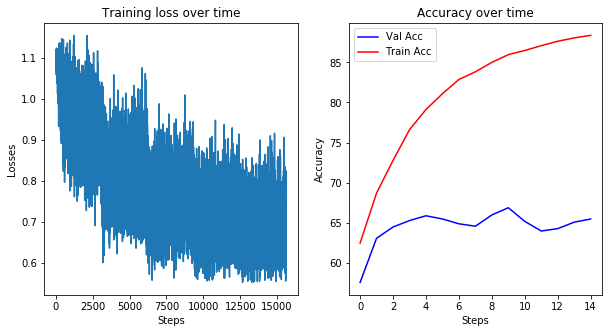

In [69]:
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Logreg = logreg(vocab_size, emb_dim, input_dim=emb_dim, num_classes=num_classes)

SNLI_Model = train_model(Logreg, 'Logreg_element', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=0.01, num_epochs=5, adj=False, plot=True)

Epoch: [1/5], Step: [1001/3125], Training Acc: 44.887, Validation Acc: 44.7
Epoch: [1/5], Step: [2001/3125], Training Acc: 45.707, Validation Acc: 42.8
Epoch: [1/5], Step: [3001/3125], Training Acc: 41.64, Validation Acc: 40.0
Epoch: [2/5], Step: [1001/3125], Training Acc: 43.107, Validation Acc: 42.6
Epoch: [2/5], Step: [2001/3125], Training Acc: 44.42, Validation Acc: 41.5
Epoch: [2/5], Step: [3001/3125], Training Acc: 41.656, Validation Acc: 39.9
Epoch: [3/5], Step: [1001/3125], Training Acc: 41.973, Validation Acc: 42.3
Epoch: [3/5], Step: [2001/3125], Training Acc: 40.083, Validation Acc: 39.6
Epoch: [3/5], Step: [3001/3125], Training Acc: 38.455, Validation Acc: 36.9
Epoch: [4/5], Step: [1001/3125], Training Acc: 41.219, Validation Acc: 41.5
Epoch: [4/5], Step: [2001/3125], Training Acc: 41.115, Validation Acc: 40.8
Epoch: [4/5], Step: [3001/3125], Training Acc: 40.902, Validation Acc: 39.6
Epoch: [5/5], Step: [1001/3125], Training Acc: 42.035, Validation Acc: 40.8
Epoch: [5/5], 

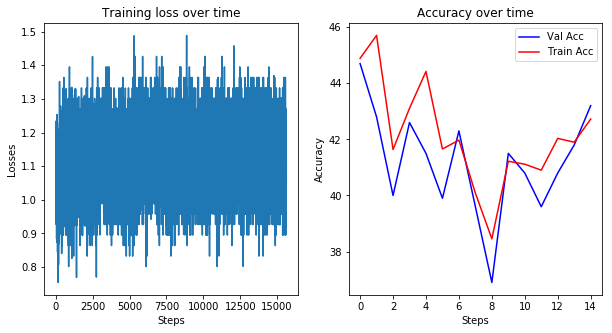

In [182]:
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Logreg = logreg(vocab_size, emb_dim, input_dim=emb_dim, num_classes=num_classes)

SNLI_Model = train_model(Logreg, 'Logreg_element_0.1', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=0.1, num_epochs=5, adj=False, plot=True)

Epoch: [1/5], Step: [1001/3125], Training Acc: 62.351, Validation Acc: 60.0
Epoch: [1/5], Step: [2001/3125], Training Acc: 68.49, Validation Acc: 61.9
Epoch: [1/5], Step: [3001/3125], Training Acc: 73.068, Validation Acc: 62.8
Epoch: [2/5], Step: [1001/3125], Training Acc: 74.768, Validation Acc: 63.6
Epoch: [2/5], Step: [2001/3125], Training Acc: 75.757, Validation Acc: 63.6
Epoch: [2/5], Step: [3001/3125], Training Acc: 76.591, Validation Acc: 63.8
Epoch: [3/5], Step: [1001/3125], Training Acc: 76.794, Validation Acc: 63.8
Epoch: [3/5], Step: [2001/3125], Training Acc: 76.883, Validation Acc: 64.0
Epoch: [3/5], Step: [3001/3125], Training Acc: 76.947, Validation Acc: 64.1
Epoch: [4/5], Step: [1001/3125], Training Acc: 76.954, Validation Acc: 64.0
Epoch: [4/5], Step: [2001/3125], Training Acc: 76.964, Validation Acc: 64.0
Epoch: [4/5], Step: [3001/3125], Training Acc: 76.975, Validation Acc: 64.0
Epoch: [5/5], Step: [1001/3125], Training Acc: 76.982, Validation Acc: 64.0
Epoch: [5/5],

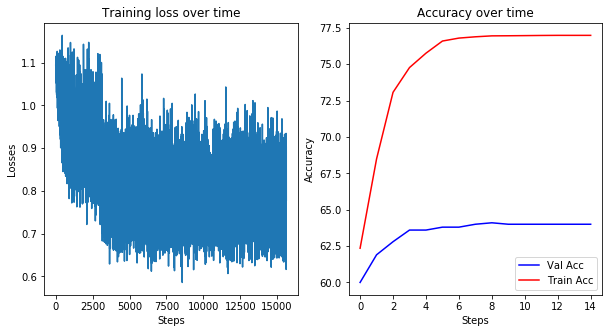

In [32]:
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Logreg = logreg(vocab_size, emb_dim, input_dim=emb_dim, num_classes=num_classes)

SNLI_Model = train_model(Logreg, 'Logreg_element_0.1adj', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=0.1, num_epochs=5, adj=True, plot=True)

Epoch: [1/5], Step: [1001/3125], Training Acc: 47.131, Validation Acc: 46.9
Epoch: [1/5], Step: [2001/3125], Training Acc: 52.102, Validation Acc: 49.8
Epoch: [1/5], Step: [3001/3125], Training Acc: 55.27, Validation Acc: 51.6
Epoch: [2/5], Step: [1001/3125], Training Acc: 55.891, Validation Acc: 52.8
Epoch: [2/5], Step: [2001/3125], Training Acc: 56.126, Validation Acc: 52.8
Epoch: [2/5], Step: [3001/3125], Training Acc: 56.329, Validation Acc: 52.9
Epoch: [3/5], Step: [1001/3125], Training Acc: 56.378, Validation Acc: 52.9
Epoch: [3/5], Step: [2001/3125], Training Acc: 56.404, Validation Acc: 53.0
Epoch: [3/5], Step: [3001/3125], Training Acc: 56.429, Validation Acc: 53.0
Epoch: [4/5], Step: [1001/3125], Training Acc: 56.433, Validation Acc: 52.9
Epoch: [4/5], Step: [2001/3125], Training Acc: 56.433, Validation Acc: 52.9
Epoch: [4/5], Step: [3001/3125], Training Acc: 56.437, Validation Acc: 52.9
Epoch: [5/5], Step: [1001/3125], Training Acc: 56.435, Validation Acc: 52.9
Epoch: [5/5],

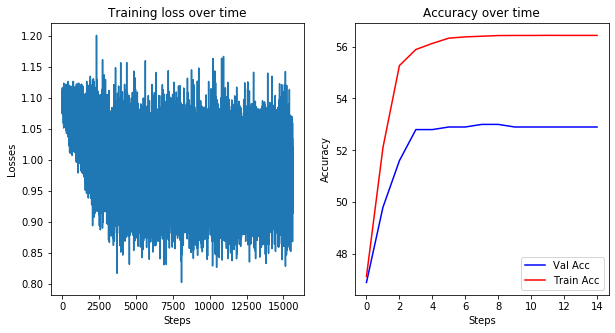

In [33]:
emb_dim = 100
num_classes = len(list(LABELS.keys()))
vocab_size = len(id2token)
Logreg = logreg(vocab_size, emb_dim, input_dim=emb_dim, num_classes=num_classes)

SNLI_Model = train_model(Logreg, 'Logreg_element_0.01adj', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=0.01, num_epochs=5, adj=True, plot=True)

### Analysis on false predicitons

In [57]:
model = torch.load("best_snli_model_Net_element.pth")

In [58]:
# sample validation
all_idx = []
total = 0
model.eval()
for data1, lengths1, data2, lengths2, labels in val_loader:
    data1_batch, lengths1_batch, data2_batch, lengths2_batch, label_batch = data1, lengths1, data2, lengths2, labels
    outputs = F.softmax(model(data1_batch, lengths1_batch, data2_batch, lengths2_batch, method='element-wise product'), dim=1)
    predicted = outputs.max(1, keepdim=True)[1]

    total += labels.size(0)
    all_idx += (predicted.numpy() == labels.view_as(predicted).numpy()).tolist()

In [59]:
correct_idx = []
wrong_idx = []
for i, val in enumerate(all_idx):
    if val[0] == True:
        correct_idx.append(i)
    else:
        wrong_idx.append(i)

**Correct and Incorrect Examples**

In [60]:
LABELS_INVERSE={v:k for k,v in LABELS.items()}

In [76]:
print("Correct Examples:")
for i in correct_idx[:3]:
#     print(i)
    print("\n")
    print('Premise: {}'.format(' '.join(val_premise_tokens[i])))
    print('Hypothesis: {}'.format(' '.join(val_hypothesis_tokens[i])))
    print('Correct Label: {}'.format(LABELS_INVERSE[val_labels[i]]))

print("-----------------------------------------------------------------------------------------------------------------------")
print("Wrong Examples:")
for i in wrong_idx[:3]:
#     print(i)
    print("\n")
    print('Premise: {}'.format(' '.join(val_premise_tokens[i])))
    print('Hypothesis: {}'.format(' '.join(val_hypothesis_tokens[i])))
    print('Correct Label: {}'.format(LABELS_INVERSE[val_labels[i]]))

Correct Examples:


Premise: four people sit on a subway two read books one looks at a cellphone and is wearing knee high boots
Hypothesis: multiple people are on a subway together with each of them doing their own thing
Correct Label: entailment


Premise: bicycles stationed while a group of people socialize
Hypothesis: people get together near a stand of bicycles
Correct Label: entailment


Premise: man in overalls with two horses
Hypothesis: a man in overalls with two horses
Correct Label: entailment
-----------------------------------------------------------------------------------------------------------------------
Wrong Examples:


Premise: three women on a stage one wearing red shoes black pants and a gray shirt is sitting on a prop another is sitting on the floor and the third wearing a black shirt and pants is standing as a gentleman in the back tunes an instrument
Hypothesis: there are two women standing on the stage
Correct Label: contradiction


Premise: two women one walk

## Evaluate on MultiNLI

### Pytorch DataLoader for MNLI

In [77]:
import torch
from torch.utils.data import Dataset

class MNLIDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list1, data_list2, target_list):
        """
        @param data_list: list of MNLI tokens 
        @param target_list: list of MNLI targets 

        """
        self.data_list1 = data_list1
        self.data_list2 = data_list2
        self.target_list = target_list
        assert (len(self.data_list1) == len(self.target_list))
        assert (len(self.data_list2) == len(self.target_list))

    def __len__(self):
        return len(self.data_list1)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        token_idx1 = self.data_list1[key][:mnli_MAX_SENTENCE_LENGTH1]
        token_idx2 = self.data_list2[key][:mnli_MAX_SENTENCE_LENGTH2]
        label = self.target_list[key]
        return [token_idx1, len(token_idx1), token_idx2, len(token_idx2), label]


In [78]:
def MNLI_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list1 = []
    data_list2 = []
    label_list = []
    length_list1 = []
    length_list2= []
#     print("collate batch: ", batch[0][0])
#     batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[4])
        length_list1.append(datum[1])
        length_list2.append(datum[3])
    # padding
    for datum in batch:
        padded_vec1 = np.pad(np.array(datum[0]), 
                                pad_width=((0,mnli_MAX_SENTENCE_LENGTH1-datum[1])), 
                                mode="constant", constant_values=0)
        padded_vec2 = np.pad(np.array(datum[2]), 
                                pad_width=((0,mnli_MAX_SENTENCE_LENGTH2-datum[3])), 
                                mode="constant", constant_values=0)
        data_list1.append(padded_vec1)
        data_list2.append(padded_vec2)
        
    return [torch.from_numpy(np.array(data_list1)), torch.LongTensor(length_list1), 
            torch.from_numpy(np.array(data_list2)), torch.LongTensor(length_list2),torch.LongTensor(label_list)]

In [79]:
GENRES

{'telephone': 0, 'fiction': 1, 'slate': 2, 'government': 3, 'travel': 4}

In [80]:
# load best model
nn_best_model = torch.load('best_snli_model_Net_element.pth')
logreg_best_model = torch.load('best_snli_model_Logreg_element.pth')

**Telephone**

In [81]:
mnli_val_tel_idx = [idx for idx,val in enumerate(mnli_val_genres) if mnli_val_genres[idx]==0]
mnli_val_tel_s1 = [mnli_val_premise_indices[idx] for idx in mnli_val_tel_idx]
mnli_val_tel_s2 = [mnli_val_hypothesis_indices[idx] for idx in mnli_val_tel_idx]
mnli_val_tel_y = [mnli_val_labels[idx] for idx in mnli_val_tel_idx]
mnli_val_dataset_tel = MNLIDataset(mnli_val_tel_s1, mnli_val_tel_s2, mnli_val_tel_y)
mnli_val_loader_tel = torch.utils.data.DataLoader(dataset=mnli_val_dataset_tel, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=False)

In [82]:
print("Val acc of best neuralnet on MNLI(telephone):{}".format(test_model(mnli_val_loader_tel, nn_best_model, 'element-wise product')))
print("Val acc of best logreg on MNLI(telephone):{}".format(test_model(mnli_val_loader_tel, logreg_best_model, 'element-wise product')))

Val acc of best neuralnet on MNLI(telephone):41.89054726368159
Val acc of best logreg on MNLI(telephone):44.875621890547265


**Fiction**

In [83]:
mnli_val_fic_idx = [idx for idx,val in enumerate(mnli_val_genres) if mnli_val_genres[idx]==1]
mnli_val_fic_s1 = [mnli_val_premise_indices[idx] for idx in mnli_val_fic_idx]
mnli_val_fic_s2 = [mnli_val_hypothesis_indices[idx] for idx in mnli_val_fic_idx]
mnli_val_fic_y = [mnli_val_labels[idx] for idx in mnli_val_fic_idx]
mnli_val_dataset_fic = MNLIDataset(mnli_val_fic_s1, mnli_val_fic_s2, mnli_val_fic_y)
mnli_val_loader_fic = torch.utils.data.DataLoader(dataset=mnli_val_dataset_fic, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=False)

In [84]:
print("Val acc of best neuralnet on MNLI(fiction):{}".format(test_model(mnli_val_loader_fic, nn_best_model, 'element-wise product')))
print("Val acc of best logreg on MNLI(fiction):{}".format(test_model(mnli_val_loader_fic, logreg_best_model, 'element-wise product')))

Val acc of best neuralnet on MNLI(fiction):42.21105527638191
Val acc of best logreg on MNLI(fiction):41.20603015075377


**Slate**

In [85]:
mnli_val_slate_idx = [idx for idx, val in enumerate(mnli_val_genres) if mnli_val_genres[idx]==2]
mnli_val_slate_s1 = [mnli_val_premise_indices[idx] for idx in mnli_val_slate_idx]
mnli_val_slate_s2 = [mnli_val_hypothesis_indices[idx] for idx in mnli_val_slate_idx]
mnli_val_slate_y = [mnli_val_labels[idx] for idx in mnli_val_slate_idx]
mnli_val_dataset_slate = MNLIDataset(mnli_val_slate_s1, mnli_val_slate_s2, mnli_val_slate_y)
mnli_val_loader_slate = torch.utils.data.DataLoader(dataset=mnli_val_dataset_slate, 
                                           batch_size=32,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=True)

In [86]:
print("Val acc of best neuralnet on MNLI(slate):{}".format(test_model(mnli_val_loader_slate, nn_best_model, 'element-wise product')))
print("Val acc of best logreg on MNLI(slate):{}".format(test_model(mnli_val_loader_slate, logreg_best_model, 'element-wise product')))

Val acc of best neuralnet on MNLI(slate):39.321357285429144
Val acc of best logreg on MNLI(slate):39.421157684630735


**Government**

In [87]:
mnli_val_gov_idx = [idx for idx, val in enumerate(mnli_val_genres) if mnli_val_genres[idx]==3]
mnli_val_gov_s1 = [mnli_val_premise_indices[idx] for idx in mnli_val_gov_idx]
mnli_val_gov_s2 = [mnli_val_hypothesis_indices[idx] for idx in mnli_val_gov_idx]
mnli_val_gov_y = [mnli_val_labels[idx] for idx in mnli_val_gov_idx]
mnli_val_dataset_gov = MNLIDataset(mnli_val_gov_s1, mnli_val_gov_s2, mnli_val_gov_y)
mnli_val_loader_gov = torch.utils.data.DataLoader(dataset=mnli_val_dataset_gov, 
                                           batch_size=32,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=True)

In [88]:
print("Val acc of best neuralnet on MNLI(government):{}".format(test_model(mnli_val_loader_gov, nn_best_model, 'element-wise product')))
print("Val acc of best logreg on MNLI(government):{}".format(test_model(mnli_val_loader_gov, logreg_best_model, 'element-wise product')))

Val acc of best neuralnet on MNLI(government):37.303149606299215
Val acc of best logreg on MNLI(government):39.37007874015748


**Travel**

In [89]:
mnli_val_tra_idx = [idx for idx, val in enumerate(mnli_val_genres) if mnli_val_genres[idx]==2]
mnli_val_tra_s1 = [mnli_val_premise_indices[idx] for idx in mnli_val_tra_idx]
mnli_val_tra_s2 = [mnli_val_hypothesis_indices[idx] for idx in mnli_val_tra_idx]
mnli_val_tra_y = [mnli_val_labels[idx] for idx in mnli_val_tra_idx]
mnli_val_dataset_tra = MNLIDataset(mnli_val_tra_s1, mnli_val_tra_s2, mnli_val_tra_y)
mnli_val_loader_tra = torch.utils.data.DataLoader(dataset=mnli_val_dataset_tra, 
                                           batch_size=32,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=True)

In [90]:
print("Val acc of best neuralnet on MNLI(travel):{}".format(test_model(mnli_val_loader_tra, nn_best_model, 'element-wise product')))
print("Val acc of best logreg on MNLI(travel):{}".format(test_model(mnli_val_loader_tra, logreg_best_model, 'element-wise product')))

Val acc of best neuralnet on MNLI(travel):39.321357285429144
Val acc of best logreg on MNLI(travel):39.421157684630735


## Fine-tune on MultiNLI

In [91]:
# Function for testing the model
def finetune_test_model(loader, model, method, PATH):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.load_state_dict(torch.load(PATH))
    model.eval()
    for data1, lengths1, data2, lengths2, labels in loader:
        data1_batch, lengths1_batch, data2_batch, lengths2_batch, label_batch = data1, lengths1, data2, lengths2, labels
        outputs = F.softmax(model(data1_batch, lengths1_batch, data2_batch, lengths2_batch, method), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

In [92]:
# Fine_Tune

def fine_tune_model(model, model_name, train_loader, val_loader, num_epochs, lr, method):
    '''
    model: the model object
    train_loader, val_loader
    optim: optimizer, str
    lr: initiated learning rate, float
    num_epochs: number of epoch, int
    adj: boolean, to adjust learning rate or not
    gamma: learning rate dedaying factor
    plot: boolean, to plot training loss and accuracy over time
    '''
    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()

    # Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # Print model's state_dict
    print("Model's state_dict:")
    for param_tensor in model.state_dict():
        print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    
    train_loss = [] # to store training losses
    val_acc_lst = [] # to store validation accuracy
    
    for epoch in range(num_epochs):
        for i, (data1, lengths1, data2, lengths2, labels) in enumerate(train_loader):
            data1_batch, lengths1_batch, data2_batch, lengths2_batch, label_batch = data1, lengths1, data2, lengths2, labels
            model.train()
            optimizer.zero_grad()
            # Forward pass
            outputs = F.softmax(model(data1_batch, lengths1_batch, data2_batch, lengths2_batch, method), dim=1)
            loss = criterion(outputs, label_batch)
            train_loss.append(loss)
            
            # Backward and optimize
            loss.backward()
            optimizer.step()
                
    print('Finished training')
    PATH='finetune_mnli_model_'+str(model_name)+'.pth'
    torch.save(model.state_dict(), PATH)
    print('Val Acc:{}'.format(finetune_test_model(val_loader, model, method, PATH)))

    return 

**Telephone**

In [92]:
mnli_train_tel_idx = [idx for idx, val in enumerate(mnli_val_genres) if mnli_val_genres[idx]==0]
mnli_train_tel_s1 = [mnli_train_premise_indices[idx] for idx in mnli_train_tel_idx]
mnli_train_tel_s2 = [mnli_train_hypothesis_indices[idx] for idx in mnli_train_tel_idx]
mnli_train_tel_y = [mnli_train_labels[idx] for idx in mnli_train_tel_idx]
mnli_train_dataset_tel = MNLIDataset(mnli_train_tel_s1, mnli_train_tel_s2, mnli_train_tel_y)
mnli_train_loader_tel = torch.utils.data.DataLoader(dataset=mnli_train_dataset_tel, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=True)

In [93]:
fine_tune_model(nn_best_model, 'model_tel_nn', mnli_train_loader_tel, mnli_val_loader_tel, num_epochs=5, lr=0.01, method='element-wise product')
fine_tune_model(logreg_best_model, 'model_tel_logreg', mnli_train_loader_tel, mnli_val_loader_tel, num_epochs=5, lr=0.01, method='element-wise product')

Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([20, 100])
fc1.bias 	 torch.Size([20])
fc2.weight 	 torch.Size([3, 20])
fc2.bias 	 torch.Size([3])
Finished training
Val Acc:45.87064676616915
Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([3, 100])
fc1.bias 	 torch.Size([3])
Finished training
Val Acc:42.885572139303484


**Fiction**

In [94]:
mnli_train_fic_idx = [idx for idx,val in enumerate(mnli_train_genres) if mnli_train_genres[idx]==1]
mnli_train_fic_s1 = [mnli_train_premise_indices[idx] for idx in mnli_train_fic_idx]
mnli_train_fic_s2 = [mnli_train_hypothesis_indices[idx] for idx in mnli_train_fic_idx]
mnli_train_fic_y = [mnli_train_labels[idx] for idx in mnli_train_fic_idx]
mnli_train_dataset_fic = MNLIDataset(mnli_train_fic_s1, mnli_train_fic_s2, mnli_train_fic_y)
mnli_train_loader_fic = torch.utils.data.DataLoader(dataset=mnli_train_dataset_fic, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=True)

In [95]:
fine_tune_model(nn_best_model, 'model_fic_nn', mnli_train_loader_fic, mnli_val_loader_fic, num_epochs=5, lr=0.01, method='element-wise product')
fine_tune_model(logreg_best_model, 'model_fic_logreg', mnli_train_loader_fic, mnli_val_loader_fic, num_epochs=5, lr=0.01, method='element-wise product')

Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([20, 100])
fc1.bias 	 torch.Size([20])
fc2.weight 	 torch.Size([3, 20])
fc2.bias 	 torch.Size([3])
Finished training
Val Acc:47.23618090452261
Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([3, 100])
fc1.bias 	 torch.Size([3])
Finished training
Val Acc:44.221105527638194


**Slate**

In [96]:
mnli_train_sla_idx = [idx for idx,val in enumerate(mnli_train_genres) if mnli_train_genres[idx]==2]
mnli_train_sla_s1 = [mnli_train_premise_indices[idx] for idx in mnli_train_sla_idx]
mnli_train_sla_s2 = [mnli_train_hypothesis_indices[idx] for idx in mnli_train_sla_idx]
mnli_train_sla_y = [mnli_train_labels[idx] for idx in mnli_train_sla_idx]
mnli_train_dataset_sla = MNLIDataset(mnli_train_sla_s1, mnli_train_sla_s2, mnli_train_sla_y)
mnli_train_loader_sla = torch.utils.data.DataLoader(dataset=mnli_train_dataset_sla, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=True)

In [97]:
fine_tune_model(nn_best_model, 'model_sla_nn', mnli_train_loader_sla, mnli_val_loader_slate, num_epochs=5, lr=0.01, method='element-wise product')
fine_tune_model(logreg_best_model, 'model_sla_logreg', mnli_train_loader_sla, mnli_val_loader_slate, num_epochs=5, lr=0.01, method='element-wise product')

Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([20, 100])
fc1.bias 	 torch.Size([20])
fc2.weight 	 torch.Size([3, 20])
fc2.bias 	 torch.Size([3])
Finished training
Val Acc:41.31736526946108
Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([3, 100])
fc1.bias 	 torch.Size([3])
Finished training
Val Acc:40.7185628742515


**Government**

In [100]:
mnli_train_gov_idx = [idx for idx,val in enumerate(mnli_train_genres) if mnli_train_genres[idx]==3]
mnli_train_gov_s1 = [mnli_train_premise_indices[idx] for idx in mnli_train_gov_idx]
mnli_train_gov_s2 = [mnli_train_hypothesis_indices[idx] for idx in mnli_train_gov_idx]
mnli_train_gov_y = [mnli_train_labels[idx] for idx in mnli_train_gov_idx]
mnli_train_dataset_gov = MNLIDataset(mnli_train_gov_s1, mnli_train_gov_s2, mnli_train_gov_y)
mnli_train_loader_gov = torch.utils.data.DataLoader(dataset=mnli_train_dataset_gov, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=True)

In [103]:
fine_tune_model(nn_best_model, 'model_gov_nn', mnli_train_loader_gov, mnli_val_loader_gov, num_epochs=5, lr=0.01, method='element-wise product')
fine_tune_model(logreg_best_model, 'model_gov_logreg', mnli_train_loader_gov, mnli_val_loader_gov, num_epochs=5, lr=0.01, method='element-wise product')

Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([20, 100])
fc1.bias 	 torch.Size([20])
fc2.weight 	 torch.Size([3, 20])
fc2.bias 	 torch.Size([3])
Finished training
Val Acc:50.0
Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([3, 100])
fc1.bias 	 torch.Size([3])
Finished training
Val Acc:49.311023622047244


**Travel**

In [104]:
mnli_train_tra_idx = [idx for idx,val in enumerate(mnli_train_genres) if mnli_train_genres[idx]==4]
mnli_train_tra_s1 = [mnli_train_premise_indices[idx] for idx in mnli_train_fic_idx]
mnli_train_tra_s2 = [mnli_train_hypothesis_indices[idx] for idx in mnli_train_fic_idx]
mnli_train_tra_y = [mnli_train_labels[idx] for idx in mnli_train_fic_idx]
mnli_train_dataset_tra = MNLIDataset(mnli_train_fic_s1, mnli_train_fic_s2, mnli_train_fic_y)
mnli_train_loader_tra = torch.utils.data.DataLoader(dataset=mnli_train_dataset_gov, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=MNLI_collate_func,
                                           shuffle=True)

In [105]:
fine_tune_model(nn_best_model, 'model_tra_nn', mnli_train_loader_tra, mnli_train_loader_tra, num_epochs=5, lr=0.01, method='element-wise product')
fine_tune_model(logreg_best_model, 'model_tra_logreg', mnli_train_loader_tra, mnli_train_loader_tra, num_epochs=5, lr=0.01, method='element-wise product')

Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([20, 100])
fc1.bias 	 torch.Size([20])
fc2.weight 	 torch.Size([3, 20])
fc2.bias 	 torch.Size([3])
Finished training
Val Acc:82.28174092196755
Model's state_dict:
embed.weight 	 torch.Size([10002, 100])
fc1.weight 	 torch.Size([3, 100])
fc1.bias 	 torch.Size([3])
Finished training
Val Acc:80.2214782384754


In [259]:
Counter(mnli_train_genres)

Counter({0: 4270, 1: 3836, 2: 4026, 3: 3883, 4: 3985})

### Use fined-tuned model of on genre on the other genre

In [65]:
# Here I will use the fine-tuned telephone model on other genres
print('Genre: Travel, Present Val Acc:{}, Previous Val Acc:{}'.format(finetune_test_model(mnli_val_loader_tra, nn_best_model, 'element-wise product', 'finetune_mnli_model_model_tel_nn.pth'), \
                                                                      test_model(mnli_val_loader_tra, nn_best_model, 'element-wise product')))
print('Genre: Fiction, Present Val Acc:{}, Previous Val Acc:{}'.format(finetune_test_model(mnli_val_loader_fic, nn_best_model, 'element-wise product', 'finetune_mnli_model_model_tel_nn.pth'), \
                                                                      test_model(mnli_val_loader_fic, nn_best_model, 'element-wise product')))
print('Genre: Government, Present Val Acc:{}, Previous Val Acc:{}'.format(finetune_test_model(mnli_val_loader_gov,nn_best_model, 'element-wise product', 'finetune_mnli_model_model_tel_nn.pth'), \
                                                                      test_model(mnli_val_loader_gov, nn_best_model, 'element-wise product')))
print('Genre: Slate, Present Val Acc:{}, Previous Val Acc:{}'.format(finetune_test_model(mnli_val_loader_slate, nn_best_model, 'element-wise product', 'finetune_mnli_model_model_tel_nn.pth'), \
                                                                      test_model(mnli_val_loader_slate, nn_best_model, 'element-wise product')))

Genre: Travel, Present Val Acc:42.91417165668663, Previous Val Acc:42.91417165668663
Genre: Fiction, Present Val Acc:44.824120603015075, Previous Val Acc:44.824120603015075
Genre: Government, Present Val Acc:41.732283464566926, Previous Val Acc:41.732283464566926
Genre: Slate, Present Val Acc:42.91417165668663, Previous Val Acc:42.91417165668663


Conclusion: Does not really make any difference

## Pre-trained Word Embedding

In [94]:
# preparing embedding layer
embeddings_index = {}
WIKI_DIR = '/Users/nimiwang/Desktop/1011 NLP/'
f = open(os.path.join(WIKI_DIR, 'wiki-news-300d-1M.vec'))
for line in f:
    values = line.split(" ")
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 999995 word vectors.


In [95]:
emb_dim=300 # as seen above
max_vocab_size=len(token2id)
embedding_matrix = np.zeros((max_vocab_size, emb_dim)) # embedding_matrix should be size of max_vocab_size, embed_dim
for token, idx in token2id.items():
    embedding_vector = embeddings_index.get(token)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[idx] = embedding_vector

embedding_matrix=torch.from_numpy(embedding_matrix).type(torch.FloatTensor) # convert np.array to float tensor

In [96]:
# define nn
class pretrained_net(nn.Module):
    """
    2 layer NN with wiki-news embedding
    """
    def __init__(self, emb_matrix, input_dim, hidden_dim, num_classes, p=0):
        """
        @param emb_matrix: pre-trained embedding matrix
        @param input_dim: size of the input after embedding
        @param hidden_dim: number of hidden nodes in the hidden layer
        @param num_classes: number of classes (target)
        @param p: proportion of Dropout, if not Dropout, p = 0, float
        """
        super(pretrained_net, self).__init__()
        self.emb_matrix, self.input_dim, self.hidden_dim, self.num_classes, self.dropout_rate = \
        emb_matrix, input_dim, hidden_dim, num_classes, p
        self.embed = nn.Embedding.from_pretrained(self.emb_matrix, freeze=True) # use pre-trained wiki embedding weights; 
                                                                           # freeze: embedding.weight.requires_grad = False; does not update
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, data1, lengths1, data2, lengths2, method):
        """
        @param combined_data: matrix of size (batch_size, emb_size*2).
        """
        # embeddings for data1
        out1 = self.embed(data1) # out.shape: batch_size * max_seq_length * emb_dim
        out1 = torch.sum(out1, dim=1) # out.shape: batch_size * emb_dim (concat along the max_seq_length dimension)
        out1 /= lengths1.view(lengths1.size()[0],1).expand_as(out1).float() # out.shape: batch_size * emb_dim (just scaling by the sequence REAL length)
        
        # embeddings for data2
        out2 = self.embed(data2) # out.shape: batch_size * max_seq_length * emb_dim
        out2 = torch.sum(out2, dim=1) # out.shape: batch_size * emb_dim (concat along the max_seq_length dimension)
        out2 /= lengths2.view(lengths2.size()[0],1).expand_as(out2).float() # out.shape: batch_size * emb_dim (just scaling by the sequence REAL length)
        
        out_combined = merge_two_matrices(out1, out2, method)

        out_combined = self.fc1(out_combined)
        out_combined = F.relu(out_combined)
        out_combined = F.dropout(out_combined, p=self.dropout_rate)
        out_combined = self.fc2(out_combined) # out_combined.shape: batch_size * num_classes
        
        return out_combined

In [97]:
# define logreg
class pretrained_logreg(nn.Module):
    """
    Logistic regression with BagOfWords embedding
    """
    def __init__(self, emb_matrix, input_dim, num_classes):
        """
        @param emb_matrix: pre-trained embedding matrix
        @param input_dim: size of the input after embeddings
        @param num_classes: number of targets
        """
        super(pretrained_logreg, self).__init__()
        self.embed = nn.Embedding.from_pretrained(emb_matrix, freeze=True) # use pre-trained wiki embedding weights; 
                                                                           # freeze: embedding.weight.requires_grad = False; does not update
        self.fc1 = nn.Linear(input_dim, num_classes)
    
    def forward(self, data1, lengths1, data2, lengths2, method):
        """
        @param combined_data: matrix of size (batch_size, emb_size*2).
        """
        # embeddings for data1
        out1 = self.embed(data1) # out.shape: batch_size * max_seq_length * emb_dim
        out1 = torch.sum(out1, dim=1) # out.shape: batch_size * emb_dim (concat along the max_seq_length dimension)
        out1 /= lengths1.view(lengths1.size()[0],1).expand_as(out1).float() # out.shape: batch_size * emb_dim (just scaling by the sequence REAL length)
        
        # embeddings for data1
        out2 = self.embed(data2) # out.shape: batch_size * max_seq_length * emb_dim
        out2 = torch.sum(out2, dim=1) # out.shape: batch_size * emb_dim (concat along the max_seq_length dimension)
        out2 /= lengths2.view(lengths2.size()[0],1).expand_as(out2).float() # out.shape: batch_size * emb_dim (just scaling by the sequence REAL length)
        
        out_combined = merge_two_matrices(out1, out2, method)
        
        out_combined = self.fc1(out_combined) # out_combined.shape: batch_size * num_classes
        
        return out_combined

**Re-do 3.1: Train a new SNLI model with pre-trained embeddings**

Epoch: [1/5], Step: [1001/3125], Training Acc: 47.585, Validation Acc: 44.3
Epoch: [1/5], Step: [2001/3125], Training Acc: 49.812, Validation Acc: 45.4
Epoch: [1/5], Step: [3001/3125], Training Acc: 54.289, Validation Acc: 51.9
Epoch: [2/5], Step: [1001/3125], Training Acc: 52.552, Validation Acc: 50.0
Epoch: [2/5], Step: [2001/3125], Training Acc: 54.859, Validation Acc: 52.3
Epoch: [2/5], Step: [3001/3125], Training Acc: 55.536, Validation Acc: 53.7
Epoch: [3/5], Step: [1001/3125], Training Acc: 55.114, Validation Acc: 53.2
Epoch: [3/5], Step: [2001/3125], Training Acc: 54.264, Validation Acc: 51.8
Epoch: [3/5], Step: [3001/3125], Training Acc: 55.641, Validation Acc: 53.8
Epoch: [4/5], Step: [1001/3125], Training Acc: 55.573, Validation Acc: 54.1
Epoch: [4/5], Step: [2001/3125], Training Acc: 55.828, Validation Acc: 54.1
Epoch: [4/5], Step: [3001/3125], Training Acc: 56.249, Validation Acc: 55.4
Epoch: [5/5], Step: [1001/3125], Training Acc: 55.015, Validation Acc: 54.5
Epoch: [5/5]

/anaconda3/lib/python3.6/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type pretrained_net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


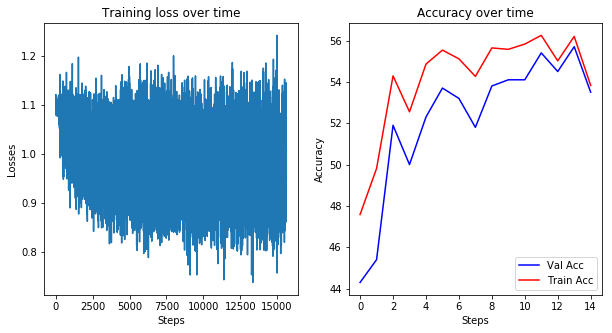

In [98]:
# nn
emb_dim = 300
emb_matrix = embedding_matrix
num_classes = len(list(LABELS.keys()))
Pretrained_net = pretrained_net(emb_matrix, input_dim=emb_dim, hidden_dim=20, num_classes=num_classes, p=0)
pretrained_SNLI_model = train_model(Pretrained_net, 'prenet_element', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=0.01, num_epochs=5, adj=False, plot=True)

In [ ]:
# logreg
emb_dim = 300
emb_matrix = embedding_matrix
num_classes = len(list(LABELS.keys()))
Pretrained_logreg = pretrained_logreg(emb_matrix, input_dim=emb_dim, num_classes=num_classes)
pretrained_SNLI_model2 = train_model(Pretrained_logreg, 'prelog_element', train_loader, val_loader, method='element-wise product', \
                optim='Adam', lr=0.01, num_epochs=5, adj=False, plot=True)

Epoch: [1/5], Step: [1001/3125], Training Acc: 45.687, Validation Acc: 43.9
Epoch: [1/5], Step: [2001/3125], Training Acc: 46.576, Validation Acc: 44.9
Epoch: [1/5], Step: [3001/3125], Training Acc: 50.42, Validation Acc: 49.5
Epoch: [2/5], Step: [1001/3125], Training Acc: 49.388, Validation Acc: 47.7
Epoch: [2/5], Step: [2001/3125], Training Acc: 51.705, Validation Acc: 48.8


In [99]:
model = torch.load("best_snli_model_prenet_element.pth")

# sample validation
all_idx = []
total = 0
model.eval()
for data1, lengths1, data2, lengths2, labels in val_loader:
    data1_batch, lengths1_batch, data2_batch, lengths2_batch, label_batch = data1, lengths1, data2, lengths2, labels
    outputs = F.softmax(model(data1_batch, lengths1_batch, data2_batch, lengths2_batch, method='element-wise product'), dim=1)
    predicted = outputs.max(1, keepdim=True)[1]

    total += labels.size(0)
    all_idx += (predicted.numpy() == labels.view_as(predicted).numpy()).tolist()
    
correct_idx = []
wrong_idx = []
for i, val in enumerate(all_idx):
    if val[0] == True:
        correct_idx.append(i)
    else:
        wrong_idx.append(i)

In [100]:
print("Correct Examples:")
for i in correct_idx[:3]:
#     print(i)
    print("\n")
    print('Premise: {}'.format(' '.join(val_premise_tokens[i])))
    print('Hypothesis: {}'.format(' '.join(val_hypothesis_tokens[i])))
    print('Correct Label: {}'.format(LABELS_INVERSE[val_labels[i]]))

print("-----------------------------------------------------------------------------------------------------------------------")
print("Wrong Examples:")
for i in wrong_idx[:3]:
#     print(i)
    print("\n")
    print('Premise: {}'.format(' '.join(val_premise_tokens[i])))
    print('Hypothesis: {}'.format(' '.join(val_hypothesis_tokens[i])))
    print('Correct Label: {}'.format(LABELS_INVERSE[val_labels[i]]))

Correct Examples:


Premise: four people sit on a subway two read books one looks at a cellphone and is wearing knee high boots
Hypothesis: multiple people are on a subway together with each of them doing their own thing
Correct Label: entailment


Premise: man in overalls with two horses
Hypothesis: a man in overalls with two horses
Correct Label: entailment


Premise: man observes a wavelength given off by an electronic device
Hypothesis: the man is examining what wavelength is given off by the device
Correct Label: entailment
-----------------------------------------------------------------------------------------------------------------------
Wrong Examples:


Premise: three women on a stage one wearing red shoes black pants and a gray shirt is sitting on a prop another is sitting on the floor and the third wearing a black shirt and pants is standing as a gentleman in the back tunes an instrument
Hypothesis: there are two women standing on the stage
Correct Label: contradiction


P

**re-do 3.2 Evaluate on MultiNLI**

In [269]:
pretrained_nn=torch.load('best_snli_model_prenet_element.pth')
pretrained_logreg=torch.load('best_snli_model_prelog_element.pth')

In [ ]:
print("Val acc of best neuralnet on MNLI(telephone):{}".format(test_model(mnli_val_loader_tel, pretrained_nn, 'element-wise product')))
print("Val acc of best logreg on MNLI(telephone):{}".format(test_model(mnli_val_loader_tel, pretrained_logreg, 'element-wise product')))
print("Val acc of best neuralnet on MNLI(fiction):{}".format(test_model(mnli_val_loader_fic, pretrained_nn, 'element-wise product')))
print("Val acc of best logreg on MNLI(fiction):{}".format(test_model(mnli_val_loader_fic, pretrained_logreg, 'element-wise product')))
print("Val acc of best neuralnet on MNLI(slate):{}".format(test_model(mnli_val_loader_slate, pretrained_nn, 'element-wise product')))
print("Val acc of best logreg on MNLI(slate):{}".format(test_model(mnli_val_loader_slate, pretrained_logreg, 'element-wise product')))
print("Val acc of best neuralnet on MNLI(government):{}".format(test_model(mnli_val_loader_gov, pretrained_nn, 'element-wise product')))
print("Val acc of best logreg on MNLI(government):{}".format(test_model(mnli_val_loader_gov, pretrained_logreg, 'element-wise product')))
print("Val acc of best neuralnet on MNLI(travel):{}".format(test_model(mnli_val_loader_tra, pretrained_nn, 'element-wise product')))
print("Val acc of best logreg on MNLI(travel):{}".format(test_model(mnli_val_loader_tra, pretrained_logreg, 'element-wise product')))

## Analyzing Learned Word Embedding

In [43]:
def find_most_similar_word(embed_matrix):
    normalize_vector = lambda l:l/np.linalg.norm(l)
    for i in range(embed_matrix.shape[0]):
        embed_matrix[i] = normalize_vector(embed_matrix[i])

    product = np.dot(embed_matrix,embed_matrix.T)

    np.fill_diagonal (product,0)

    product_flatten = np.matrix.flatten(product)

    max_indexes = []
    for i in range(30):
        max_index = np.nanargmax(product_flatten)
        max_indexes.append(max_index)
        product_flatten[max_index] = 0

    i = 0
    for max_index in max_indexes:
        first_word = max_index//embed_matrix.shape[0]
        second_word = max_index%embed_matrix.shape[0]
        if i%2 == 0:
            print('{} and {} have {} of the similarity score'.format(id2token[first_word],id2token[second_word],product[first_word,second_word],4))
        i +=1

In [184]:
## nn_best_model
find_most_similar_word(nn_best_model.state_dict()['embed.weight'].numpy())

tall and sad have 0.7447402477264404 of the similarity score
sitting and sits have 0.7426776885986328 of the similarity score
no and nothing have 0.7397510409355164 of the similarity score
cats and nothing have 0.7117267847061157 of the similarity score
no and frowning have 0.702558696269989 of the similarity score
favorite and joyously have 0.6931725740432739 of the similarity score
no and nobody have 0.6906219124794006 of the similarity score
alone and nobody have 0.6891882419586182 of the similarity score
because and sad have 0.6856215596199036 of the similarity score
no and cats have 0.6824354529380798 of the similarity score
no and only have 0.673235297203064 of the similarity score
empty and cats have 0.671751856803894 of the similarity score
sleeping and nothing have 0.6712570190429688 of the similarity score
only and frowning have 0.6707717776298523 of the similarity score
no and n't have 0.6704748868942261 of the similarity score


In [185]:
## logreg_best_model
find_most_similar_word(logreg_best_model.state_dict()['embed.weight'].numpy())

no and nobody have 0.8180833458900452 of the similarity score
sad and joyously have 0.7885147929191589 of the similarity score
sleeping and asleep have 0.763414740562439 of the similarity score
nothing and silently have 0.7508991956710815 of the similarity score
no and nothing have 0.74535071849823 of the similarity score
siblings and joyously have 0.732618510723114 of the similarity score
sitting and sit have 0.729503870010376 of the similarity score
nothing and aliens have 0.7275766730308533 of the similarity score
nothing and actually have 0.7245376110076904 of the similarity score
sleeping and sleeps have 0.7238885760307312 of the similarity score
brothers and joyously have 0.7237866520881653 of the similarity score
nobody and never have 0.7237042784690857 of the similarity score
tall and sad have 0.7101843953132629 of the similarity score
no and cats have 0.7075361013412476 of the similarity score
nobody and quietly have 0.7056280374526978 of the similarity score


In [36]:
# pretrained embedding layer
embeddings_index = {}
f = open('wiki-news-300d-1M.vec')
flag = 0
for line in f:
    if flag > 0:
        values = line.split(" ")
        word = values[0]
        if word in list(token2id.keys()):
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    else:
        flag += 1
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 9896 word vectors.


In [45]:
find_most_similar_word(np.array(list(embeddings_index.values())))

them and hands have 0.9886677265167236 of the similarity score
waiting and boat have 0.9886077642440796 of the similarity score
blond and boat have 0.9857078790664673 of the similarity score
boat and rock have 0.9850192070007324 of the similarity score
baby and them have 0.9848513603210449 of the similarity score
blond and rock have 0.9848496913909912 of the similarity score
back and rock have 0.9848403930664062 of the similarity score
waiting and them have 0.9846048355102539 of the similarity score
waiting and blond have 0.9837766289710999 of the similarity score
blond and back have 0.9825494289398193 of the similarity score
jeans and them have 0.9818590879440308 of the similarity score
waiting and hands have 0.981438934803009 of the similarity score
jeans and waiting have 0.9805459976196289 of the similarity score
motorbike and ceiling have 0.980441153049469 of the similarity score
waiting and rock have 0.9802217483520508 of the similarity score


In [134]:
### find which vectors change the most for NN model 
# Word embedding from section 3.1
before_embedding_nn = nn_best_model.state_dict()['embed.weight'].numpy()
# word embedding from section 3.4
after_embedding_tel_nn = torch.load('finetune_mnli_model_model_tel_nn.pth')['embed.weight'].numpy()
after_embedding_fic_nn = torch.load('finetune_mnli_model_model_fic_nn.pth')['embed.weight'].numpy()
after_embedding_sla_nn = torch.load('finetune_mnli_model_model_sla_nn.pth')['embed.weight'].numpy()
after_embedding_gov_nn = torch.load('finetune_mnli_model_model_gov_nn.pth')['embed.weight'].numpy()
after_embedding_tra_nn = torch.load('finetune_mnli_model_model_tra_nn.pth')['embed.weight'].numpy()

In [136]:
def find_words_change_most(before_embedding,after_embedding,genres):
    normalize_vector = lambda l:l/np.linalg.norm(l)
    
    for i in range(before_embedding.shape[0]):
        before_embedding[i] = normalize_vector(before_embedding[i])
        
    for i in range(after_embedding.shape[0]):
        after_embedding[i] = normalize_vector(after_embedding[i])

    product = np.dot(before_embedding,after_embedding.T)

    self_similarity = product.diagonal()
    self_similarity.setflags(write=1)
    #print(self_similarity)

    #product_flatten = np.matrix.flatten(product)

    min_indexes = []
    for i in range(5):
        min_index = np.nanargmin(self_similarity)
        min_indexes.append(min_index)
        self_similarity[min_index] = 1

    for min_index in min_indexes:
        print('"{}" has very different embedding vectors before and after on {} dataset'.format(id2token[min_index],genres))


In [137]:
find_words_change_most(before_embedding_nn,after_embedding_tel_nn,'Tel')

/Users/xiao/miniconda3/envs/sunshine_NLP/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


"acts" has very different embedding vectors before and after on Tel dataset
"shaping" has very different embedding vectors before and after on Tel dataset
"caution" has very different embedding vectors before and after on Tel dataset
"a" has very different embedding vectors before and after on Tel dataset
"stamp" has very different embedding vectors before and after on Tel dataset


In [138]:
find_words_change_most(before_embedding_nn,after_embedding_fic_nn,'Fic')

/Users/xiao/miniconda3/envs/sunshine_NLP/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


"acts" has very different embedding vectors before and after on Fic dataset
"caution" has very different embedding vectors before and after on Fic dataset
"shaping" has very different embedding vectors before and after on Fic dataset
"stamp" has very different embedding vectors before and after on Fic dataset
"seeks" has very different embedding vectors before and after on Fic dataset


In [139]:
find_words_change_most(before_embedding_nn,after_embedding_sla_nn,'Sla')

/Users/xiao/miniconda3/envs/sunshine_NLP/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


"caution" has very different embedding vectors before and after on Sla dataset
"teeter" has very different embedding vectors before and after on Sla dataset
"acts" has very different embedding vectors before and after on Sla dataset
"seeks" has very different embedding vectors before and after on Sla dataset
"companion" has very different embedding vectors before and after on Sla dataset


In [140]:
find_words_change_most(before_embedding_nn,after_embedding_gov_nn,'Gov')

/Users/xiao/miniconda3/envs/sunshine_NLP/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


"protects" has very different embedding vectors before and after on Gov dataset
"choosing" has very different embedding vectors before and after on Gov dataset
"seeks" has very different embedding vectors before and after on Gov dataset
"treats" has very different embedding vectors before and after on Gov dataset
"began" has very different embedding vectors before and after on Gov dataset


In [141]:
find_words_change_most(before_embedding_nn,after_embedding_tra_nn,'Tra')

/Users/xiao/miniconda3/envs/sunshine_NLP/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


"boys" has very different embedding vectors before and after on Tra dataset
"observes" has very different embedding vectors before and after on Tra dataset
"supplies" has very different embedding vectors before and after on Tra dataset
"brand" has very different embedding vectors before and after on Tra dataset
"landed" has very different embedding vectors before and after on Tra dataset
